In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for matplotlib plots
plt.style.use('seaborn')

# Set pandas option to display a larger number of columns
pd.set_option('display.max_columns', 200)

In [2]:
# Read the data from the CSV file into a DataFrame
data = pd.read_csv('CarPrice_Assignment.csv')

# Create a copy of the original DataFrame
df = data.copy()

## Data inspection

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Display the last 5 rows of the DataFrame
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(205, 26)

In [6]:
# Get the column names of the DataFrame
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
# Get information about the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing

In [8]:
# Select relevant columns for analysis
df = df[[#'car_ID', 
    'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']].copy()

In [9]:
# Display the first 5 rows of the updated DataFrame
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Get information about the updated DataFrame, including data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
# Get the column names of the DataFrame
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
# Display unique values in the 'doornumber' column
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [13]:
# Convert 'doornumber' column from categorical to numeric
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})

df['doornumber'].unique()

array([2, 4], dtype=int64)

In [14]:
# Display unique values in the 'cylindernumber' column
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
# Convert 'cylindernumber' column from categorical to numeric
df['cylindernumber'] = df['cylindernumber'].replace(
    {'four': 4, 
     'six': 6, 
     'five': 5, 
     'three': 3, 
     'twelve': 12, 
     'two': 2, 
     'eight':8})

df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [16]:
# Get information about the DataFrame after data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [17]:
# Check for missing values in the DataFrame
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
# Check for duplicated rows in the DataFrame
df.duplicated().sum()

0

In [19]:
# Display the first 5 rows of the updated DataFrame
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# Count the occurrences of each unique value in the 'carbody' column
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [21]:
# Count the occurrences of each unique value in the 'fueltype' column
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [22]:
# Display basic statistics
df.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Feature Analysis

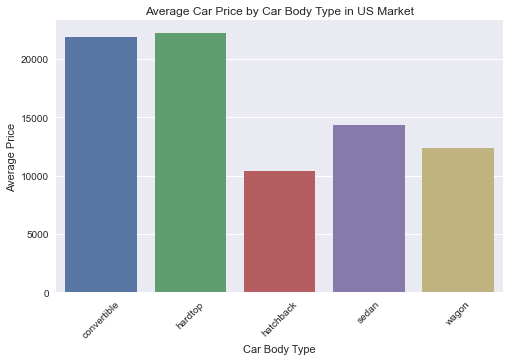

In [23]:
# Plot a bar chart showing the average car price by car body type
average_price_by_carbody = df.groupby('carbody')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='carbody', y='price', data=average_price_by_carbody)

plt.title('Average Car Price by Car Body Type in US Market')
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.show()

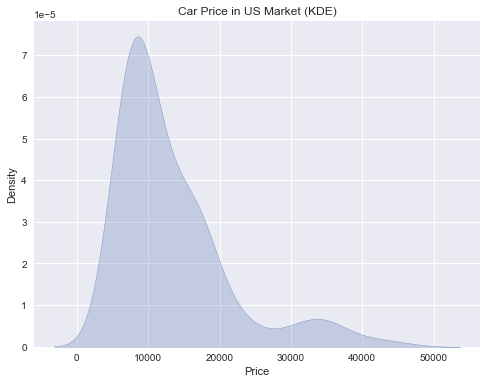

In [24]:
# Plot a Kernel Density Estimate (KDE) plot for car prices
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['price'], shade=True)

plt.title('Car Price in US Market (KDE)')
plt.xlabel('Price')

plt.show()

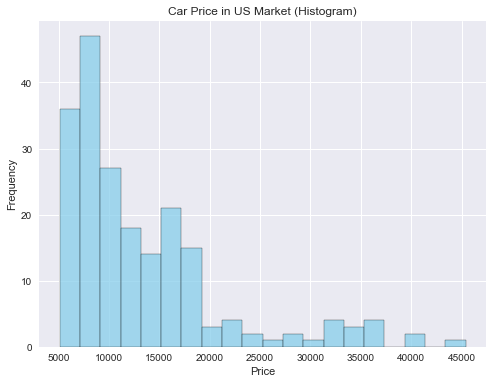

In [25]:
# Plot a histogram of car prices
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Car Price in US Market (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

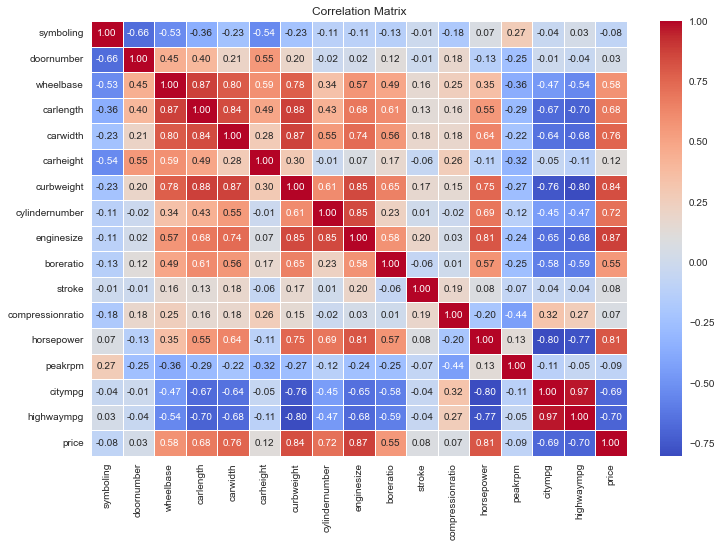

In [26]:
# Create a heatmap of the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')

plt.show()

In [27]:
# Display the first 5 rows of the updated DataFrame
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
# Display the value counts for categorical columns of interest
['fueltype', 'aspiration','carbody',
       'enginelocation', 'enginetype', 'fuelsystem']
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.carbody.value_counts())
print(df.enginelocation.value_counts())
print(df.enginetype.value_counts())
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [29]:
# Label Encoding for Categorical Columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

selected_columns = ['symboling', 'fueltype','carbody', 'aspiration','enginelocation', 
                    'doornumber', 'enginetype', 'cylindernumber', 
                     'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                    'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                    'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'drivewheel', 'fuelsystem']

# Apply Label Encoding to columns with 'object' dtype
for col in selected_columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
# Splitting the data into features (X) and target (Y)
X = df.drop(['CarName','price'], axis=1)
Y = df['price']

In [31]:
# Display the features (X)
print (X)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           2        0           2   
1            3         1           0           2        0           2   
2            1         1           0           2        2           2   
3            2         1           0           4        3           1   
4            2         1           0           4        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           4        3           2   
201         -1         1           1           4        3           2   
202         -1         1           0           4        3           2   
203         -1         0           1           4        3           2   
204         -1         1           1           4        3           2   

     enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0                 0       88.6      168.8    

In [32]:
# Display the target (Y)
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [33]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.75, random_state = 2)

In [34]:
#LinearRegression
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lin_reg_model = LinearRegression()

In [35]:
# Fit the model on the training data
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [36]:
# Predict car prices on the training data
training_data_prediction = lin_reg_model.predict(X_train)

In [37]:
# Import necessary module from scikit-learn
from sklearn import metrics

# Calculate R-squared error on the training data
error_score = metrics.r2_score(Y_train, training_data_prediction)

print("R squared Error:", error_score)

R squared Error: 0.9561075419255005


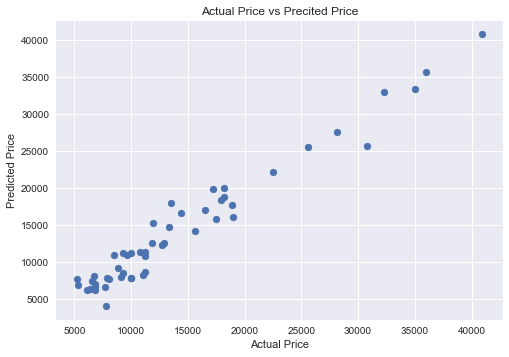

In [38]:
# Scatter plot comparing actual prices to predicted prices on the training data
plt.scatter(Y_train, training_data_prediction )

plt.xlabel("Actual Price")
plt.ylabel ("Predicted Price")
plt.title ("Actual Price vs Precited Price")

plt.show()

In [39]:
# Predict car prices on the testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [40]:
# Calculate R-squared error on the testing data
error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R squared Error:", error_score)

R squared Error: 0.5381384560731638


In [41]:
# Create a DataFrame for test data predictions
test_data_df = X_test.copy()
test_data_df['Predicted_price'] = test_data_prediction

# Display the first 5 rows of the DataFrame with actual and predicted prices
test_data_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Predicted_price
25,1,1,0,4,3,1,0,93.7,157.3,63.8,50.6,1989,3,4,90,1,2.97,3.23,9.4,68,5500,31,38,7052.800694
84,3,1,1,2,2,1,0,95.9,173.2,66.3,50.2,2926,3,4,156,6,3.59,3.86,7.0,145,5000,19,24,12415.161782
100,0,1,0,4,3,1,0,97.2,173.4,65.2,54.7,2302,3,4,120,1,3.33,3.47,8.5,97,5200,27,34,8721.956733
10,2,1,0,2,3,2,0,101.2,176.8,64.8,54.3,2395,3,4,108,5,3.50,2.80,8.8,101,5800,23,29,9843.104412
195,-1,1,0,4,4,2,0,104.3,188.8,67.2,57.5,3034,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,10647.773796


In [42]:
# Loop through each column in the test_data_df DataFrame
# and assign values from the test_data_prediction array
for i in range(len(test_data_df.columns)):
    test_data_df.iloc[i] = test_data_prediction[i]

# Assign the 'price' column from the original DataFrame 'df' to 'test_data_df'
test_data_df['price'] = df.iloc[test_data_df.index]['price']

# Display the first few rows of 'Predicted_price' and 'price' columns in 'test_data_df'
test_data_df[['Predicted_price', 'price']].head()

,Predicted_price,price
25,7052.800694,6692.0
84,12415.161782,14489.0
100,8721.956733,9549.0
10,9843.104412,16430.0
195,10647.773796,13415.0


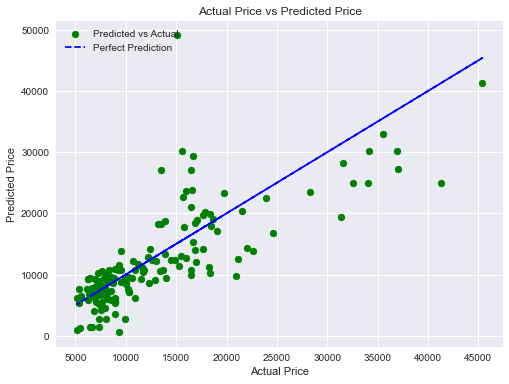

In [43]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_data_prediction, c='green', label='Predicted vs Actual')

# Perfect prediction line
plt.plot(Y_test, Y_test, c='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend(loc='upper left')
plt.grid(True)

plt.show()